In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [62]:
df = pd.read_excel("customer_churn_large_dataset.xlsx")

In [48]:
df.head()

CustomerID        Name   Age  Gender     Location  \
0         1.0  Customer_1  63.0    Male  Los Angeles   
1         2.0  Customer_2  62.0  Female     New York   
2         3.0  Customer_3  24.0  Female  Los Angeles   
3         4.0  Customer_4  36.0  Female        Miami   
4         5.0  Customer_5  46.0  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                        17.0         73.36           236.0    0.0  
1                         1.0         48.76           172.0    0.0  
2                         5.0         85.47           460.0    0.0  
3                         3.0         97.94           297.0    1.0  
4                        19.0         58.14           266.0    0.0

In [204]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [205]:
df.shape

(100000, 9)

In [186]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  float64
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  float64
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  float64
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  float64
 8   Churn                       100000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.9+ MB


In [9]:
df.describe()

CustomerID            Age  Subscription_Length_Months  \
count  100000.000000  100000.000000               100000.000000   
mean    50000.500000      44.027020                   12.490100   
std     28867.657797      15.280283                    6.926461   
min         1.000000      18.000000                    1.000000   
25%     25000.750000      31.000000                    6.000000   
50%     50000.500000      44.000000                   12.000000   
75%     75000.250000      57.000000                   19.000000   
max    100000.000000      70.000000                   24.000000   

        Monthly_Bill  Total_Usage_GB          Churn  
count  100000.000000   100000.000000  100000.000000  
mean       65.053197      274.393650       0.497790  
std        20.230696      130.463063       0.499998  
min        30.000000       50.000000       0.000000  
25%        47.540000      161.000000       0.000000  
50%        65.010000      274.000000       0.000000  
75%        82.640000      387.000000       1.000000  
max       100.000000      500.000000       1.000000

In [10]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [12]:
# Average age of customer
df['Age'].mean()

44.02702

Average age is 44 years

In [13]:
df['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

Most of the customers are female

In [14]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [15]:
df['Subscription_Length_Months'].mean()

12.4901

In [16]:
df['Monthly_Bill'].mean()

65.05319680000062

In [17]:
df['Total_Usage_GB'].mean()

274.39365

## Data Visualisation

In [18]:
sns.countplot(df['Gender'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

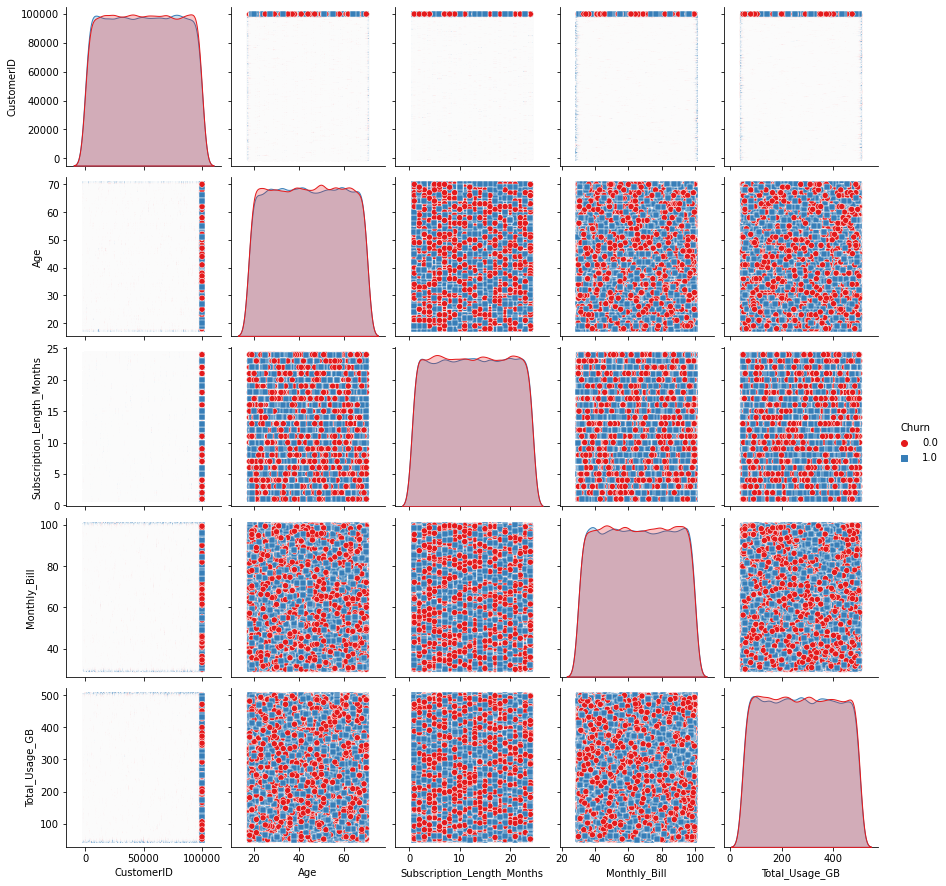

In [19]:
sns.pairplot(df, hue='Churn', markers=['o', 's'], palette='Set1')
plt.show()

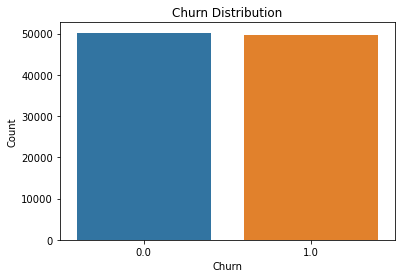

In [20]:
# Distribution of Churn
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

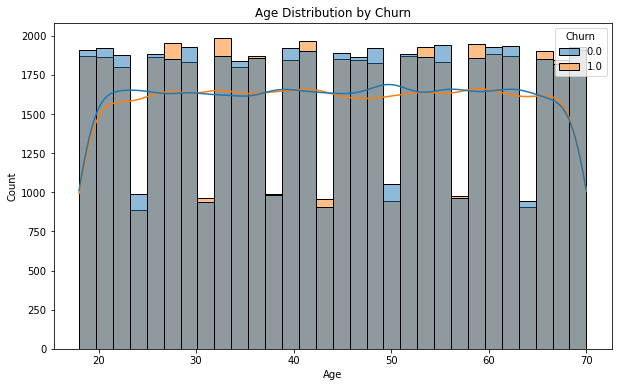

In [22]:
# Age Distribution by Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Churn', bins=30, kde=True)
plt.title('Age Distribution by Churn')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [24]:
# Monthly Bill Distribution by Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Monthly_Bill', hue='Churn', bins=30, kde=True)
plt.title('Monthly Bill Distribution by Churn')
plt.xlabel('Monthly Bill')
plt.ylabel('Count')
plt.show()

In [26]:
# Subscription Length Distribution by Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Subscription_Length_Months', hue='Churn', bins=30, kde=True)
plt.title('Subscription Length Distribution by Churn')
plt.xlabel('Subscription Length (Months)')
plt.ylabel('Count')
plt.show()

In [27]:
# Total Usage Distribution by Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total_Usage_GB', hue='Churn', bins=30, kde=True)
plt.title('Total Usage Distribution by Churn')
plt.xlabel('Total Usage (GB)')
plt.ylabel('Count')
plt.show()

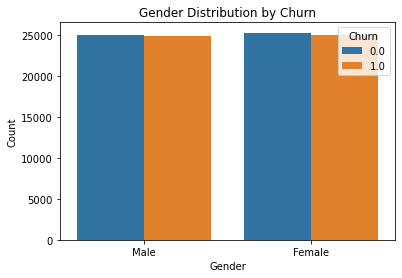

In [28]:
# Gender Distribution by Churn
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Churn')
plt.title('Gender Distribution by Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

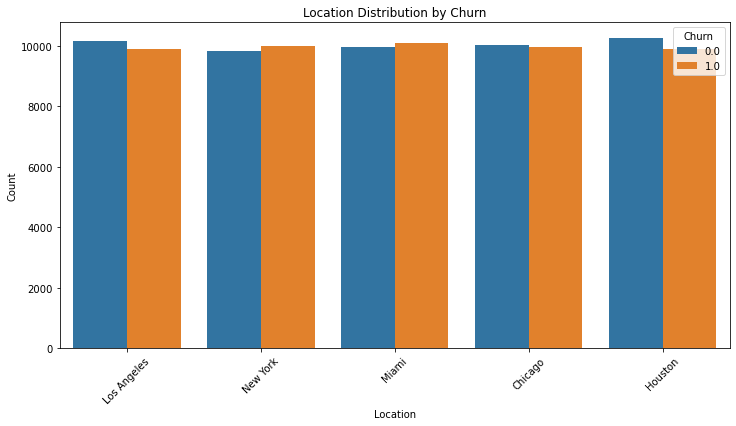

In [30]:
# Location Distribution by Churn
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Location', hue='Churn')
plt.title('Location Distribution by Churn')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

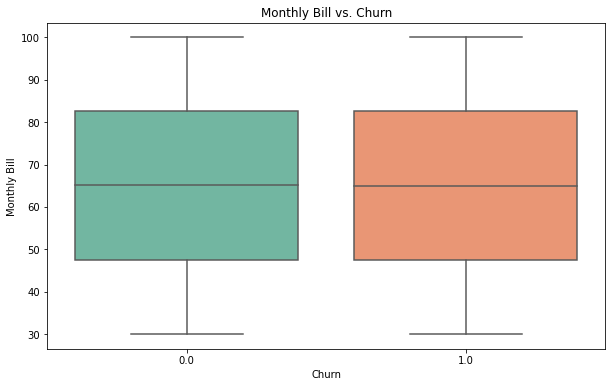

In [32]:
# Boxplot of Monthly_Bill by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='Monthly_Bill', palette='Set2')
plt.title('Monthly Bill vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Bill')
plt.show()

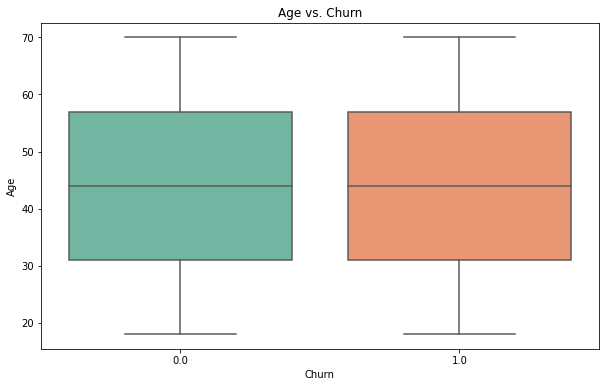

In [34]:
# Boxplot of Age by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='Age', palette='Set2')
plt.title('Age vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()

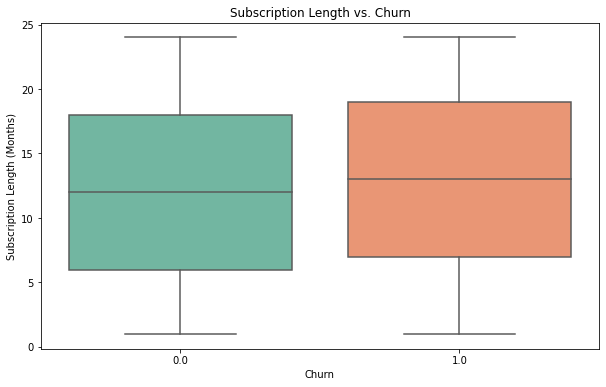

In [36]:
# Boxplot of Subscription_Length_Months by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='Subscription_Length_Months', palette='Set2')
plt.title('Subscription Length vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Subscription Length (Months)')
plt.show()

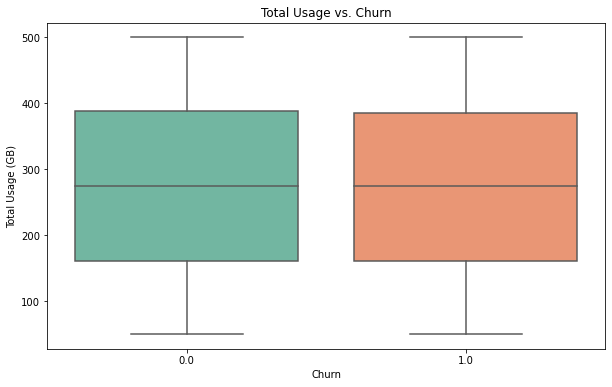

In [37]:
# Boxplot of Total_Usage_GB by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='Total_Usage_GB', palette='Set2')
plt.title('Total Usage vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Usage (GB)')
plt.show()

In [38]:
# Countplot of Subscription_Length_Months by Churn
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Subscription_Length_Months', hue='Churn', palette='Set3')
plt.title('Subscription Length vs. Churn')
plt.xlabel('Subscription Length (Months)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [40]:
# Countplot of Location by Churn
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Location', hue='Churn', palette='Set3')
plt.title('Location vs. Churn')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [41]:
# Pairplot of numerical variables by Churn
numerical_cols = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
sns.pairplot(data=df, hue='Churn', vars=numerical_cols, palette='husl')
plt.show()

In [43]:
# Correlation Heatmap
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

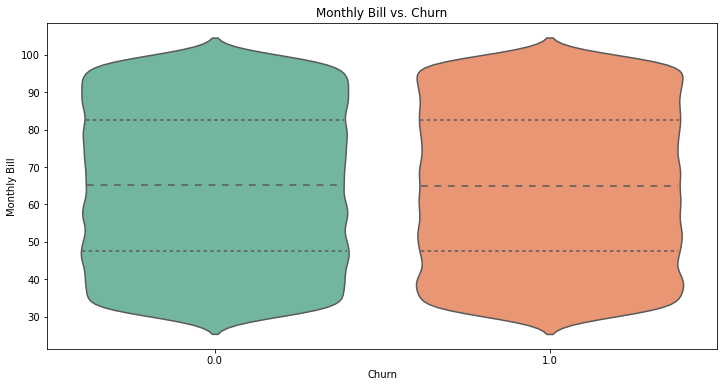

In [44]:
# Violin Plot of Monthly_Bill by Churn
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Churn', y='Monthly_Bill', palette='Set2', inner='quart')
plt.title('Monthly Bill vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Bill')
plt.show()

In [45]:
# Violin Plot of Total_Usage_GB by Churn
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Churn', y='Total_Usage_GB', palette='Set2', inner='quart')
plt.title('Total Usage vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Usage (GB)')
plt.show()

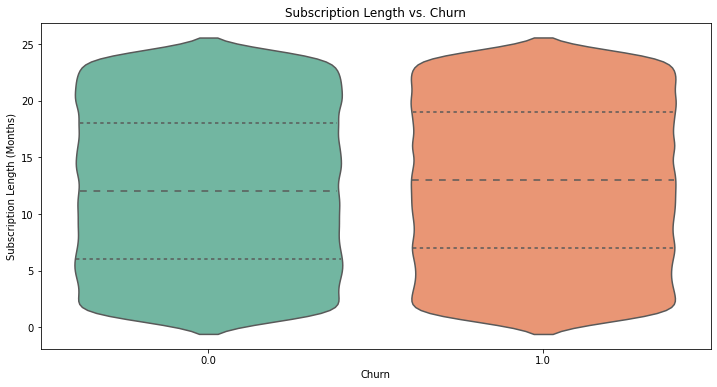

In [46]:
# Violin Plot of Subscription_Length_Months by Churn
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Churn', y='Subscription_Length_Months', palette='Set2', inner='quart')
plt.title('Subscription Length vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Subscription Length (Months)')
plt.show()

In [47]:
# Stacked Bar Chart of Churn by Gender
gender_churn = df.groupby(['Gender', 'Churn']).size().unstack()
gender_churn.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


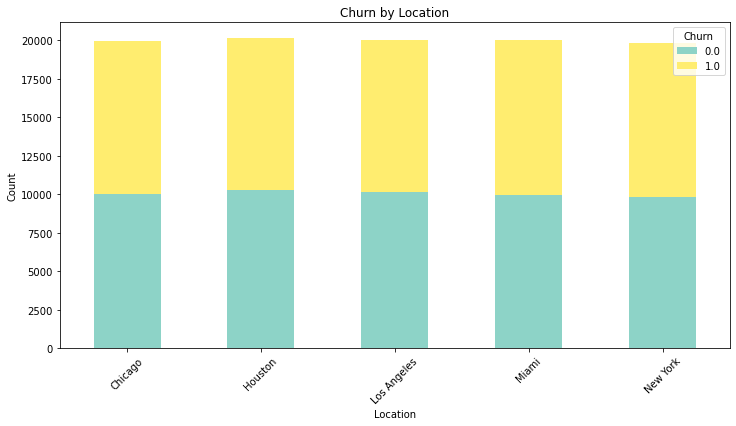

In [48]:
# Stacked Bar Chart of Churn by Location
location_churn = df.groupby(['Location', 'Churn']).size().unstack()
location_churn.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Churn by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [49]:
# Pairplot with hue by Location
sns.pairplot(data=df, hue='Location', vars=numerical_cols, palette='viridis', plot_kws={'alpha': 0.7})
plt.show()


In [50]:
# Scatterplot of Age vs. Total_Usage_GB with hue by Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Total_Usage_GB', hue='Churn', palette='Set1')
plt.title('Age vs. Total Usage GB with Churn')
plt.xlabel('Age')
plt.ylabel('Total Usage (GB)')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


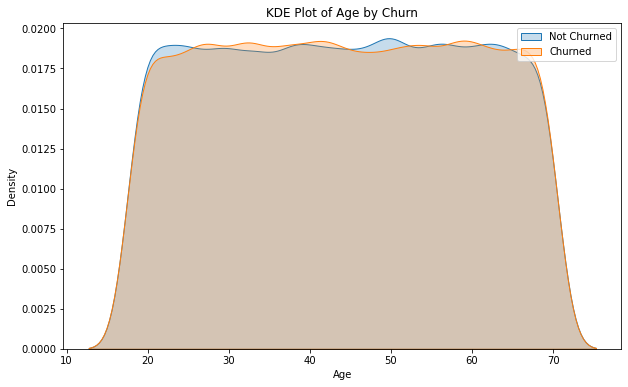

In [51]:
# KDE (Kernel Density Estimation) Plot of Age by Churn
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Churn'] == 0.0]['Age'], label='Not Churned', shade=True)
sns.kdeplot(df[df['Churn'] == 1.0]['Age'], label='Churned', shade=True)
plt.title('KDE Plot of Age by Churn')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

In [52]:
# Bar Plot of Subscription_Length_Months vs. Churn
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Subscription_Length_Months', y='Churn', palette='viridis')
plt.title('Subscription Length vs. Churn')
plt.xlabel('Subscription Length (Months)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

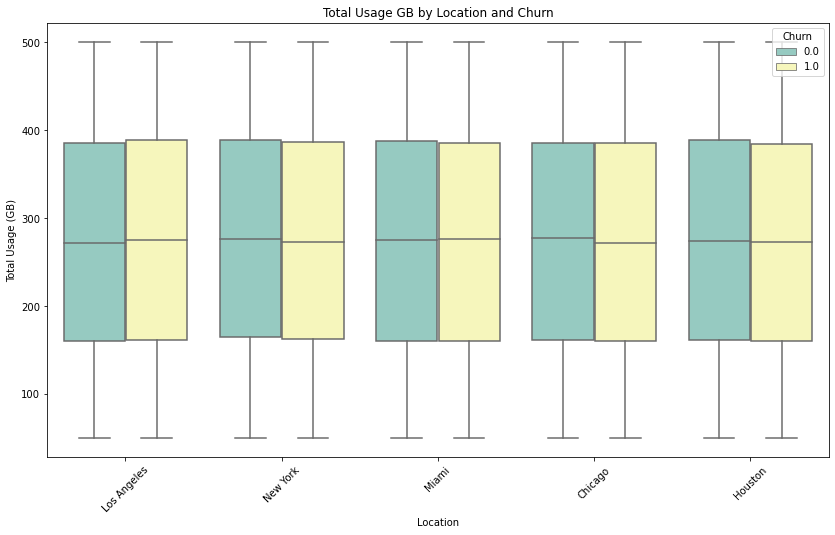

In [53]:
# Boxplot of Total_Usage_GB by Location and Churn
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Location', y='Total_Usage_GB', hue='Churn', palette='Set3')
plt.title('Total Usage GB by Location and Churn')
plt.xlabel('Location')
plt.ylabel('Total Usage (GB)')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.show()

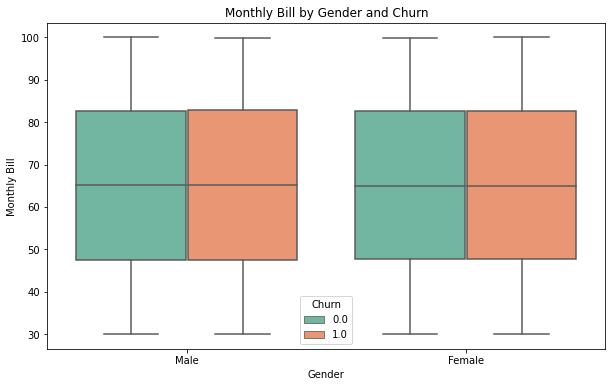

In [54]:
# Boxplot of Monthly_Bill by Gender and Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Monthly_Bill', hue='Churn', palette='Set2')
plt.title('Monthly Bill by Gender and Churn')
plt.xlabel('Gender')
plt.ylabel('Monthly Bill')
plt.show()

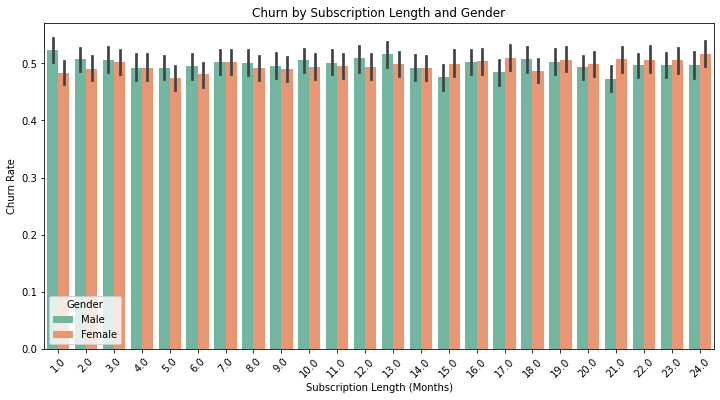

In [55]:
# Stacked Bar Chart of Churn by Subscription Length and Gender
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Subscription_Length_Months', y='Churn', hue='Gender', palette='Set2')
plt.title('Churn by Subscription Length and Gender')
plt.xlabel('Subscription Length (Months)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


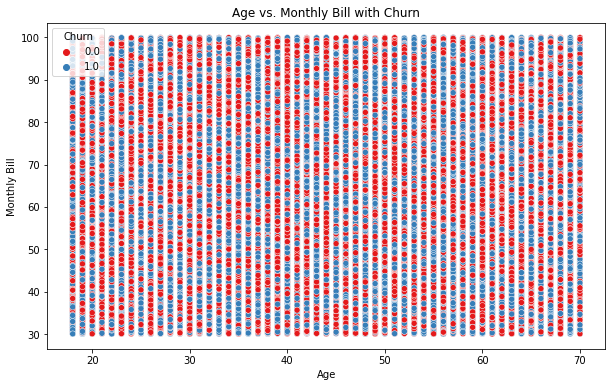

In [56]:
# Scatter Plot of Age vs. Monthly Bill with Color-Coding for Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Monthly_Bill', hue='Churn', palette='Set1')
plt.title('Age vs. Monthly Bill with Churn')
plt.xlabel('Age')
plt.ylabel('Monthly Bill')
plt.show()

In [57]:
# Bar Plot of Location vs. Churn Rate
location_churn_rate = df.groupby('Location')['Churn'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=location_churn_rate, x='Location', y='Churn', palette='Set3')
plt.title('Churn Rate by Location')
plt.xlabel('Location')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

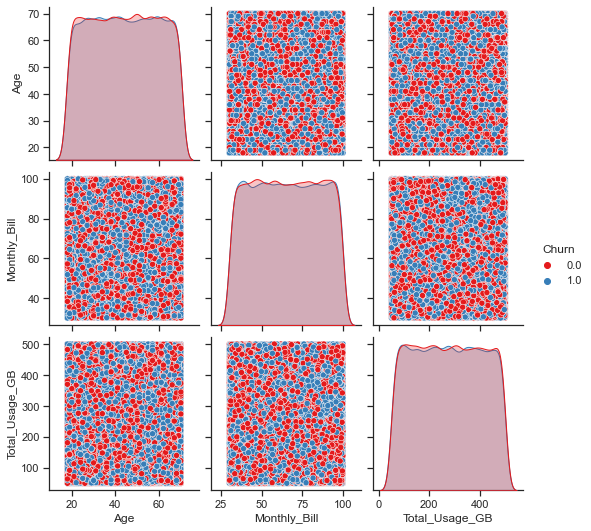

In [58]:
# Scatter Matrix for Select Features by Churn
selected_features = ['Age', 'Monthly_Bill', 'Total_Usage_GB']
sns.set(style="ticks")
sns.pairplot(data=df, vars=selected_features, hue='Churn', palette='Set1')
plt.show()

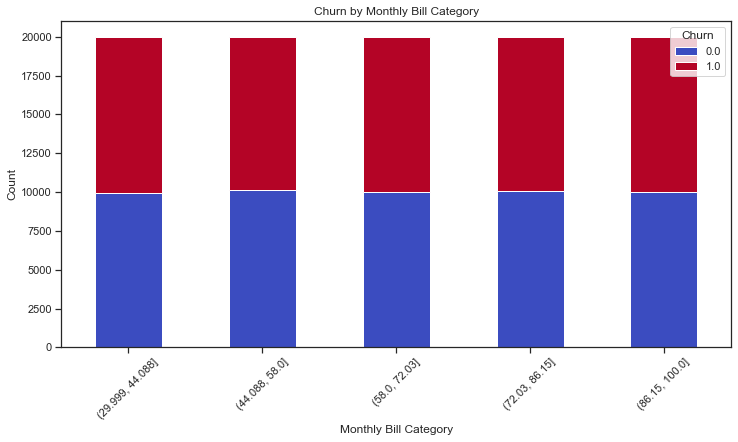

In [62]:
# Stacked Bar Chart of Churn by Monthly Bill Category
df['Monthly_Bill_Category'] = pd.qcut(df['Monthly_Bill'], q=5)
bill_churn = df.groupby(['Monthly_Bill_Category', 'Churn']).size().unstack()
bill_churn.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Churn by Monthly Bill Category')
plt.xlabel('Monthly Bill Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

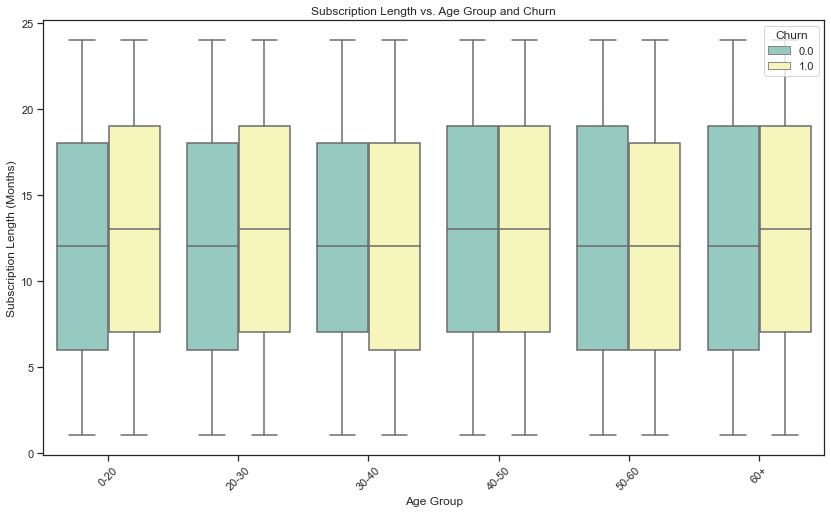

In [66]:
# Boxplot of Subscription_Length_Months by Age Group and Churn
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Age_Group', y='Subscription_Length_Months', hue='Churn', palette='Set3')
plt.title('Subscription Length vs. Age Group and Churn')
plt.xlabel('Age Group')
plt.ylabel('Subscription Length (Months)')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.show()

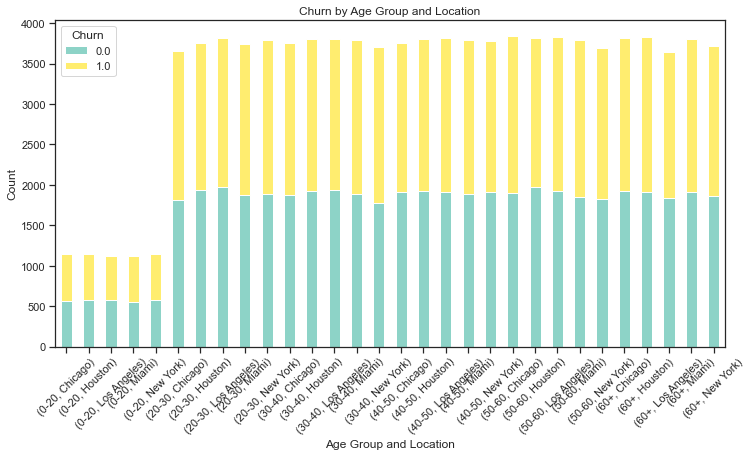

In [67]:
# Stacked Bar Chart of Churn by Age Group and Location
age_location_churn = df.groupby(['Age_Group', 'Location', 'Churn']).size().unstack().fillna(0)
age_location_churn.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Churn by Age Group and Location')
plt.xlabel('Age Group and Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Feature Engineering

In [3]:
df.head()

CustomerID        Name   Age  Gender     Location  \
0         1.0  Customer_1  63.0    Male  Los Angeles   
1         2.0  Customer_2  62.0  Female     New York   
2         3.0  Customer_3  24.0  Female  Los Angeles   
3         4.0  Customer_4  36.0  Female        Miami   
4         5.0  Customer_5  46.0  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                        17.0         73.36           236.0    0.0  
1                         1.0         48.76           172.0    0.0  
2                         5.0         85.47           460.0    0.0  
3                         3.0         97.94           297.0    1.0  
4                        19.0         58.14           266.0    0.0

<AxesSubplot:>

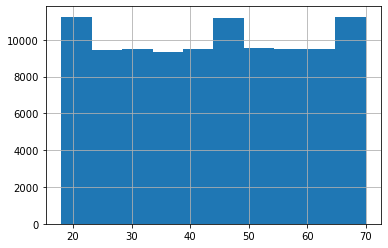

In [4]:
df['Age'].hist()

In [63]:
# Age Groups
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [64]:
df.head()

CustomerID        Name   Age  Gender     Location  \
0         1.0  Customer_1  63.0    Male  Los Angeles   
1         2.0  Customer_2  62.0  Female     New York   
2         3.0  Customer_3  24.0  Female  Los Angeles   
3         4.0  Customer_4  36.0  Female        Miami   
4         5.0  Customer_5  46.0  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn Age_Group  
0                        17.0         73.36           236.0    0.0       60+  
1                         1.0         48.76           172.0    0.0       60+  
2                         5.0         85.47           460.0    0.0     20-30  
3                         3.0         97.94           297.0    1.0     30-40  
4                        19.0         58.14           266.0    0.0     40-50

* Calculate the total charges over the subscription period by multiplying 'Monthly_Bill' by 'Subscription_Length_Months'.

In [65]:
# Total charges
df['Total_Charges'] = df['Monthly_Bill'] * df['Subscription_Length_Months']

In [66]:
df.head(2)

CustomerID        Name   Age  Gender     Location  \
0         1.0  Customer_1  63.0    Male  Los Angeles   
1         2.0  Customer_2  62.0  Female     New York   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn Age_Group  \
0                        17.0         73.36           236.0    0.0       60+   
1                         1.0         48.76           172.0    0.0       60+   

   Total_Charges  
0        1247.12  
1          48.76

* Calculate the ratio of 'Total_Usage_GB' to 'Subscription_Length_Months' to understand the average monthly data usage.

In [67]:
# Usage Ratio
df['Usage_Ratio'] = df['Total_Usage_GB'] / df['Subscription_Length_Months']

* Create interaction features by multiplying or dividing two or more existing features. For example, 'Monthly_Bill' * 'Total_Usage_GB' could represent the customer's overall spending on data.

In [68]:
# Interaction Features
df['Monthly_Bill_Total_Usage'] = df['Monthly_Bill'] * df['Total_Usage_GB']

## Data Preprocessing

In [69]:
df.head(3)

CustomerID        Name   Age  Gender     Location  \
0         1.0  Customer_1  63.0    Male  Los Angeles   
1         2.0  Customer_2  62.0  Female     New York   
2         3.0  Customer_3  24.0  Female  Los Angeles   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn Age_Group  \
0                        17.0         73.36           236.0    0.0       60+   
1                         1.0         48.76           172.0    0.0       60+   
2                         5.0         85.47           460.0    0.0     20-30   

   Total_Charges  Usage_Ratio  Monthly_Bill_Total_Usage  
0        1247.12    13.882353                  17312.96  
1          48.76   172.000000                   8386.72  
2         427.35    92.000000                  39316.20

In [70]:
df['Gender'] = df['Gender'].apply(lambda x : 1 if x == 'Male' else 0)

In [71]:
df = pd.get_dummies(data=df, columns=['Location','Age_Group'], drop_first=True)

In [72]:
df.head()

CustomerID        Name   Age  Gender  Subscription_Length_Months  \
0         1.0  Customer_1  63.0       1                        17.0   
1         2.0  Customer_2  62.0       0                         1.0   
2         3.0  Customer_3  24.0       0                         5.0   
3         4.0  Customer_4  36.0       0                         3.0   
4         5.0  Customer_5  46.0       0                        19.0   

   Monthly_Bill  Total_Usage_GB  Churn  Total_Charges  Usage_Ratio  \
0         73.36           236.0    0.0        1247.12    13.882353   
1         48.76           172.0    0.0          48.76   172.000000   
2         85.47           460.0    0.0         427.35    92.000000   
3         97.94           297.0    1.0         293.82    99.000000   
4         58.14           266.0    0.0        1104.66    14.000000   

   Monthly_Bill_Total_Usage  Location_Houston  Location_Los Angeles  \
0                  17312.96                 0                     1   
1                   8386.72                 0                     0   
2                  39316.20                 0                     1   
3                  29088.18                 0                     0   
4                  15465.24                 0                     0   

   Location_Miami  Location_New York  Age_Group_20-30  Age_Group_30-40  \
0               0                  0                0                0   
1               0                  1                0                0   
2               0                  0                1                0   
3               1                  0                0                1   
4               1                  0                0                0   

   Age_Group_40-50  Age_Group_50-60  Age_Group_60+  
0                0                0              1  
1                0                0              1  
2                0                0              0  
3                0                0              0  
4                1                0              0

## Find correlation

<AxesSubplot:>

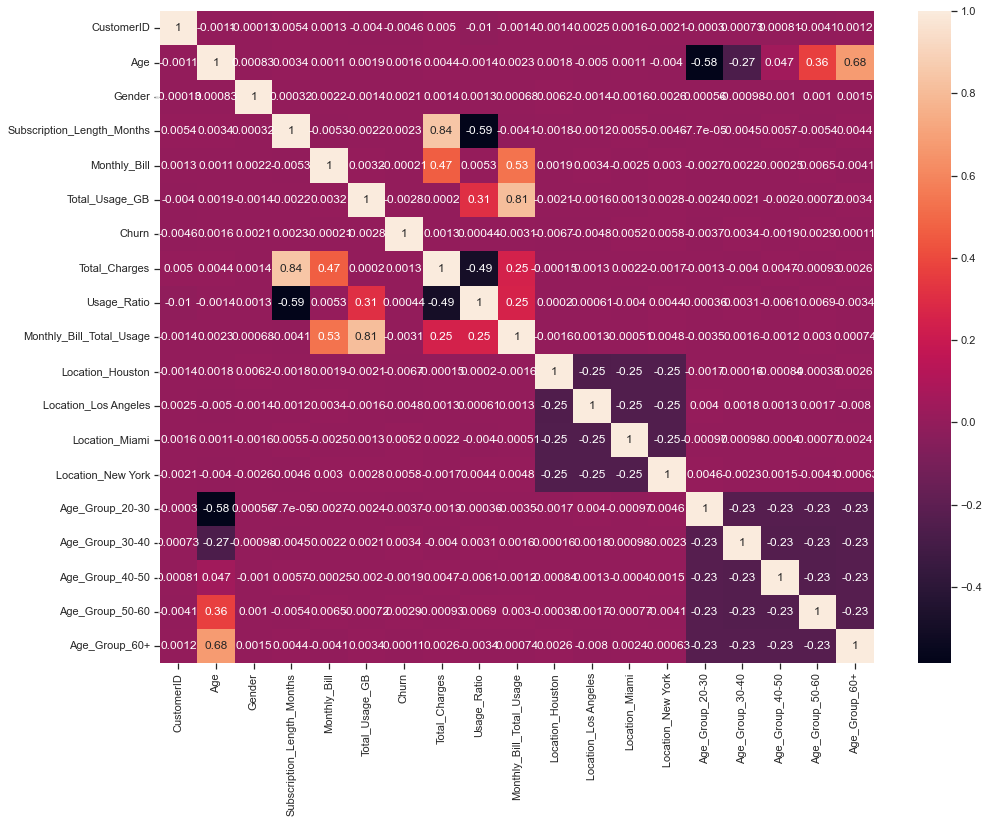

In [115]:
figure = plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True)

In [117]:
df_temp = df.drop(columns=['Age','Total_Charges','Usage_Ratio','Total_Usage_GB'],axis=1)

<AxesSubplot:>

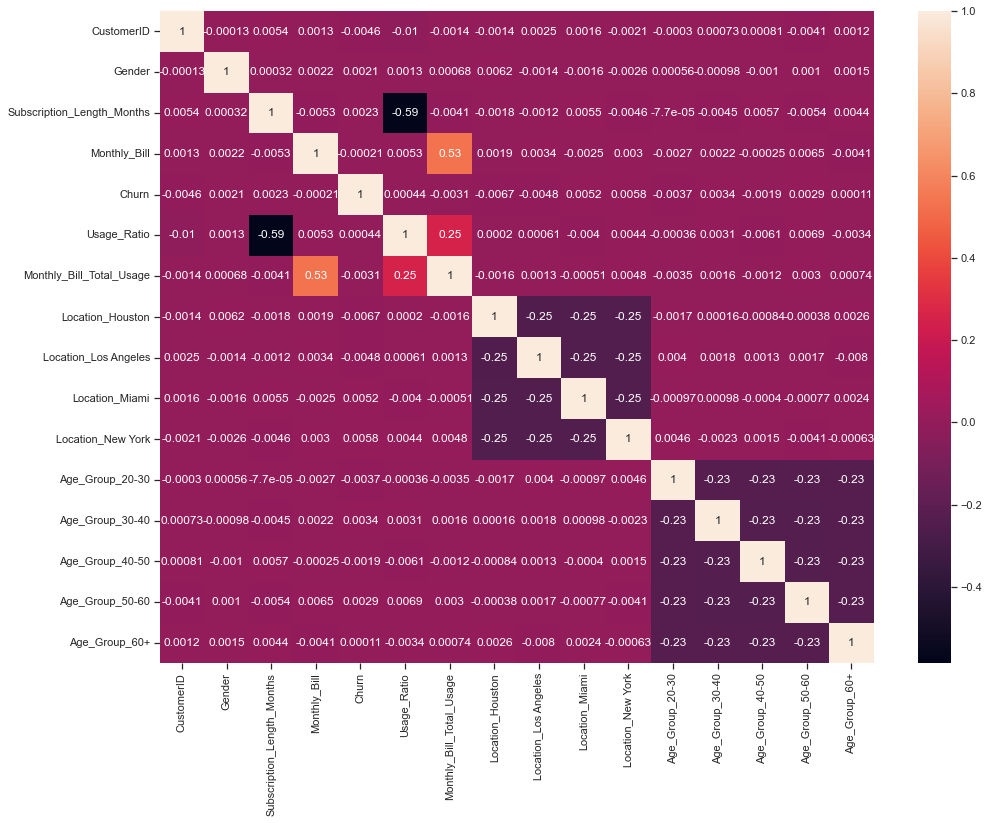

In [118]:
figure = plt.figure(figsize=(16,12))
sns.heatmap(df_temp.corr(), annot=True)

In [119]:
df_temp = df.drop(columns=['Age','Total_Charges','Total_Usage_GB','Monthly_Bill',],axis=1)

<AxesSubplot:>

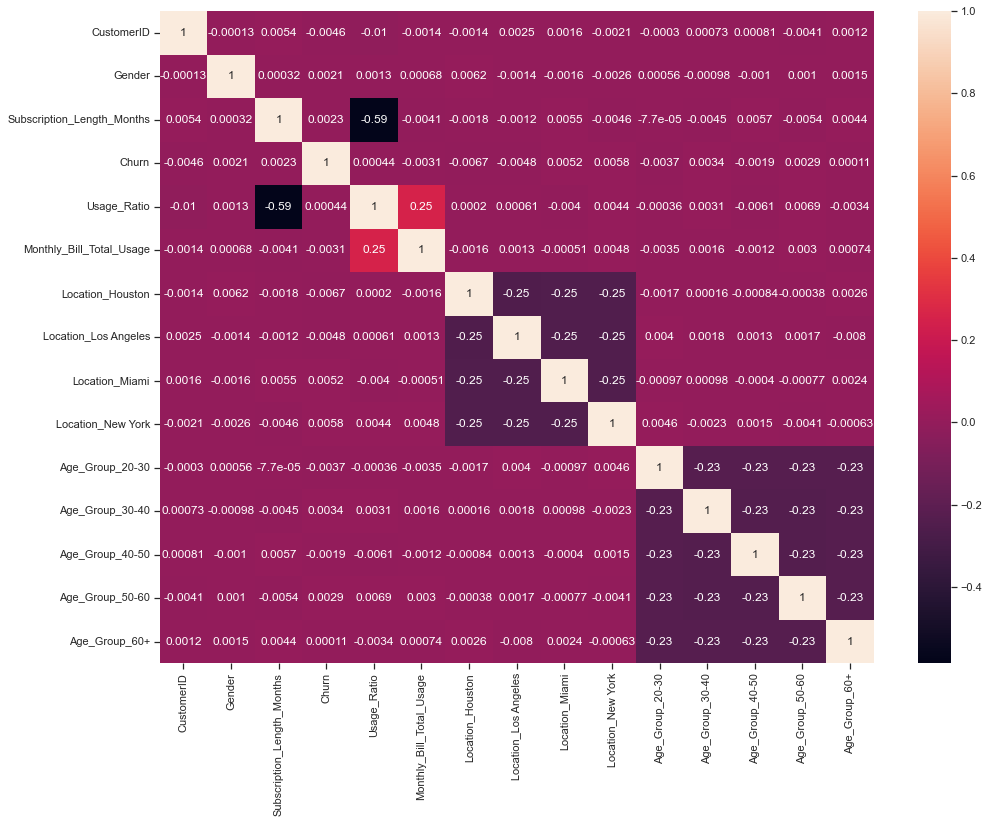

In [120]:
figure = plt.figure(figsize=(16,12))
sns.heatmap(df_temp.corr(), annot=True)

#### Dropping the columns with higher correlation

In [74]:
df.head()

CustomerID        Name   Age  Gender  Subscription_Length_Months  \
0         1.0  Customer_1  63.0       1                        17.0   
1         2.0  Customer_2  62.0       0                         1.0   
2         3.0  Customer_3  24.0       0                         5.0   
3         4.0  Customer_4  36.0       0                         3.0   
4         5.0  Customer_5  46.0       0                        19.0   

   Monthly_Bill  Total_Usage_GB  Churn  Total_Charges  Usage_Ratio  \
0         73.36           236.0    0.0        1247.12    13.882353   
1         48.76           172.0    0.0          48.76   172.000000   
2         85.47           460.0    0.0         427.35    92.000000   
3         97.94           297.0    1.0         293.82    99.000000   
4         58.14           266.0    0.0        1104.66    14.000000   

   Monthly_Bill_Total_Usage  Location_Houston  Location_Los Angeles  \
0                  17312.96                 0                     1   
1                   8386.72                 0                     0   
2                  39316.20                 0                     1   
3                  29088.18                 0                     0   
4                  15465.24                 0                     0   

   Location_Miami  Location_New York  Age_Group_20-30  Age_Group_30-40  \
0               0                  0                0                0   
1               0                  1                0                0   
2               0                  0                1                0   
3               1                  0                0                1   
4               1                  0                0                0   

   Age_Group_40-50  Age_Group_50-60  Age_Group_60+  
0                0                0              1  
1                0                0              1  
2                0                0              0  
3                0                0              0  
4                1                0              0

In [75]:
# Changing data type of churn from float to int
df = df.astype({'Churn':'int64'})

In [76]:
df['Churn'].dtype

dtype('int64')

In [77]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn', 'Total_Charges',
       'Usage_Ratio', 'Monthly_Bill_Total_Usage', 'Location_Houston',
       'Location_Los Angeles', 'Location_Miami', 'Location_New York',
       'Age_Group_20-30', 'Age_Group_30-40', 'Age_Group_40-50',
       'Age_Group_50-60', 'Age_Group_60+'],
      dtype='object')

In [78]:
# Dropping Unneccesary columns
df = df.drop(columns=['CustomerID','Name','Age','Total_Charges',
       'Usage_Ratio', 'Monthly_Bill_Total_Usage'])
# df = df.drop(columns=['Monthly_Bill_Category'])
df.head()

Gender  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  \
0       1                        17.0         73.36           236.0      0   
1       0                         1.0         48.76           172.0      0   
2       0                         5.0         85.47           460.0      0   
3       0                         3.0         97.94           297.0      1   
4       0                        19.0         58.14           266.0      0   

   Location_Houston  Location_Los Angeles  Location_Miami  Location_New York  \
0                 0                     1               0                  0   
1                 0                     0               0                  1   
2                 0                     1               0                  0   
3                 0                     0               1                  0   
4                 0                     0               1                  0   

   Age_Group_20-30  Age_Group_30-40  Age_Group_40-50  Age_Group_50-60  \
0                0                0                0                0   
1                0                0                0                0   
2                1                0                0                0   
3                0                1                0                0   
4                0                0                1                0   

   Age_Group_60+  
0              1  
1              1  
2              0  
3              0  
4              0

In [79]:
# Defining X and Y

X = df.drop('Churn',axis=1)

y = df['Churn']

In [80]:
# scaling the data using StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [81]:
X[:1]

array([[ 1.00432937,  0.65111499,  0.41060598, -0.29428898, -0.50245194,
         1.99744111, -0.50048433, -0.49707639, -0.48049482, -0.482181  ,
        -0.48325184, -0.48378705,  2.07723574]])

In [82]:
# Splitting data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
print(X_train.shape, X_test.shape,
      y_train.shape, y_test.shape)

(80000, 13) (20000, 13) (80000,) (20000,)


## Model Building

#### Logistic Regression

In [84]:
LR = LogisticRegression()

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)
print('Accuracy score with Logistic Regression is ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


Accuracy score with Logistic Regression is  0.49845
              precision    recall  f1-score   support

           0       0.50      0.61      0.55     10079
           1       0.49      0.38      0.43      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000

[[6164 3915]
 [6116 3805]]


#### RANDOM FOREST CLASSIFIER

In [85]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.4935
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     10079
           1       0.49      0.48      0.49      9921

    accuracy                           0.49     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.49      0.49      0.49     20000

[[5070 5009]
 [5121 4800]]


#### ADA BOOST CLASSIFIER

In [147]:

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

ada.fit(X_train,y_train)

y_pred = ada.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.49965
              precision    recall  f1-score   support

           0       0.50      0.63      0.56     10079
           1       0.49      0.37      0.42      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000

[[6303 3776]
 [6231 3690]]


#### SUPPORT VECTOR CLASSIFIER

In [148]:

from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.5046
              precision    recall  f1-score   support

           0       0.51      0.57      0.54     10079
           1       0.50      0.44      0.47      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

[[5723 4356]
 [5552 4369]]


#### DESISION TREE CLASSICIFIER

In [149]:

from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier()

dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.5022
              precision    recall  f1-score   support

           0       0.51      0.50      0.50     10079
           1       0.50      0.51      0.50      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

[[5009 5070]
 [4886 5035]]


#### K NEIGHBOUR CLASSIFIER

In [150]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.4998
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     10079
           1       0.50      0.50      0.50      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

[[5037 5042]
 [4962 4959]]


#### GRADIENT BOOSTING CLASSIFIER

In [151]:
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier()

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.5007
              precision    recall  f1-score   support

           0       0.50      0.61      0.55     10079
           1       0.50      0.39      0.43      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000

[[6176 3903]
 [6083 3838]]


#### BAGGING CLASSIFIER

In [152]:
from sklearn.ensemble import BaggingClassifier

bgc = BaggingClassifier()

bgc.fit(X_train,y_train)

y_pred = bgc.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.4936
              precision    recall  f1-score   support

           0       0.50      0.60      0.54     10079
           1       0.49      0.39      0.43      9921

    accuracy                           0.49     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.49      0.49      0.49     20000

[[6010 4069]
 [6059 3862]]


## Hyperparameter tuning

In [228]:
def grid_search(model,grid):
    from sklearn.model_selection import GridSearchCV, train_test_split
    from sklearn.model_selection import KFold
    from sklearn.model_selection import GridSearchCV

    cv = KFold(n_splits=3,shuffle=False,random_state=None)

    clf = GridSearchCV(model,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
    
    clf.fit(X_train,y_train)
    
    # print clf.score and best_params_
    print(clf.best_params_)
    print(clf.score(X_train,y_train))

In [233]:
# create  parameters dict in list for tunning
log_para_grid = {
    'C':10.0 **np.arange(-2,3),
    'penalty':['l2']
    }

# passing data for hyper parameter tunning with Gridsearchcv    
grid_search(LR,log_para_grid)

{'C': 1.0, 'penalty': 'l2'}
0.4998725938017474


## RamdomizedSearchCV

In [86]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_search(model,X_train, Y_train,param_grid):
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.model_selection import KFold

    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    # Fit the random search model
    cv = KFold(n_splits=3,shuffle=False,random_state=None)
    random = RandomizedSearchCV(model,param_grid,cv=cv,n_jobs=-1,scoring='f1_macro')

    #fit on train
    random.fit(X_train, y_train)
    # print best_params_
    print(random.best_params_)

In [87]:
# create parameters dict for tunning
rf_para_grid = {'n_estimators': list(range(150, 301, 50)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(3, 10, num = 3)],
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
random_search(rf,X_train,y_train,rf_para_grid)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}


In [240]:
# create parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [x for x in range(200,351, 50)], 
 'learning_rate' : [0.01, 0.1, 0.2],
 'max_depth': [x for x in range(5,7)], 
 'min_samples_split': [x for x in range(2,6)]
}

# passing data for hyper parameter tunning with Randomized search cv
random_search(gbr,X_train,y_train,GBR_para_grid)

{'n_estimators': 200, 'min_samples_split': 3, 'max_depth': 5, 'learning_rate': 0.1}


In [241]:

# create parameters dict for tunning
knn_para_grid = {
                  'leaf_size' :list(range(3,15,2)),
                  'n_neighbors' : list(range(10,30))
              }

# passing data for hyper parameter tunning with Randomized search cv
random_search(knn,X_train,y_train,knn_para_grid)

{'n_neighbors': 27, 'leaf_size': 9}


In [242]:
# create  parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : [3,5,7,9],
           "min_samples_leaf":[1,2,3,4],
           "max_features":["auto","log2","sqrt"]
              }

# passing data for hyper parameter tunning with Randomized search cv
random_search(dtr,X_train,y_train,DTR_para_grid)

{'splitter': 'best', 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 9}


In [243]:
# create  parameters dict for tunning
Ada_para_grid = {
                  'n_estimators' :[100, 200, 300],
                  'learning_rate' : [0.001, 0.01, 0.1, 1.0]
              }

# passing data for hyper parameter tunning with Randomized search cv
random_search(ada,X_train,y_train,Ada_para_grid)

{'n_estimators': 300, 'learning_rate': 1.0}


## Training model with best parameters

#### Random Forest Classifier

In [88]:
# Instantiate the model
rf = RandomForestClassifier(n_estimators= 150,
                min_samples_split= 2,
                min_samples_leaf= 1,
                max_features= 'auto',
                max_depth= 10,
                bootstrap= False)

# fitting the model on train data 

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.49515
              precision    recall  f1-score   support

           0       0.50      0.59      0.54     10079
           1       0.49      0.40      0.44      9921

    accuracy                           0.50     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.49      0.50      0.49     20000

[[5900 4179]
 [5918 4003]]


#### GradientBoosting

In [247]:
# Instantiate the model
gbr = GradientBoostingClassifier(n_estimators= 200,
                 min_samples_split= 3,
                 max_depth= 5,
                 learning_rate= 0.1)


# fitting the model on train data
gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.5076
              precision    recall  f1-score   support

           0       0.51      0.56      0.53     10079
           1       0.50      0.45      0.48      9921

    accuracy                           0.51     20000
   macro avg       0.51      0.51      0.51     20000
weighted avg       0.51      0.51      0.51     20000

[[5664 4415]
 [5433 4488]]


#### AdaBoost

In [248]:
# Instantiate the model
ada = AdaBoostClassifier(n_estimators= 300,
                 learning_rate= 1.0)


# fitting the model on train data
ada.fit(X_train,y_train)

y_pred = ada.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.49925
              precision    recall  f1-score   support

           0       0.50      0.57      0.53     10079
           1       0.49      0.43      0.46      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

[[5703 4376]
 [5639 4282]]


#### KNN

In [249]:
# Instantiate the model
knn = KNeighborsClassifier(n_neighbors=27, leaf_size= 9)


# fitting the model on train data

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.499
              precision    recall  f1-score   support

           0       0.50      0.51      0.51     10079
           1       0.49      0.49      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

[[5117 4962]
 [5058 4863]]


#### DecisionTreeClassifier

In [250]:
# Instantiate the model
dtr = DecisionTreeClassifier(splitter='best', min_samples_leaf= 2, max_features = 'sqrt', max_depth = 9)


# fitting the model on train data
dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.498
              precision    recall  f1-score   support

           0       0.50      0.60      0.55     10079
           1       0.49      0.39      0.44      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000

[[6078 4001]
 [6039 3882]]


## Saving the model

In [89]:
# saving the model

import pickle
file = open('churnpredictor.pkl','wb')
pickle.dump(rf,file)
file.close()

In [90]:
file = open('scaler.pkl','wb')
pickle.dump(scaler,file)
file.close()